<a href="https://colab.research.google.com/github/pddiste/pairs/blob/main/pairs_Pyquant_01_ws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from statsmodels.regression.rolling import RollingOLS

import yfinance as yf
import seaborn
import matplotlib.pyplot as plt

In [26]:
symbol_list = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
data = yf.download(
    symbol_list, 
    start='2015-01-01', 
    end='2016-01-01'
)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [34]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            print("i=", i, " - j=",j, keys[i], keys[j])
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                print("pairs: ", pvalue,"i=", i, " - j=",j, keys[i], keys[j])
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs, keys

In [35]:
scores, pvalues, pairs, keys = find_cointegrated_pairs(data)

i= 0  - j= 1 AAPL AMZN
i= 0  - j= 2 AAPL GOOG
i= 0  - j= 3 AAPL META
i= 0  - j= 4 AAPL NFLX
i= 1  - j= 2 AMZN GOOG
i= 1  - j= 3 AMZN META
pairs:  0.028766658091335436 i= 1  - j= 3 AMZN META
i= 1  - j= 4 AMZN NFLX
i= 2  - j= 3 GOOG META
i= 2  - j= 4 GOOG NFLX
i= 3  - j= 4 META NFLX


ValueError: ignored

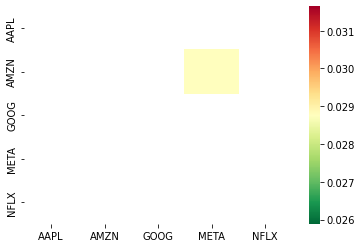

In [29]:
# utilizzare 2keys" invece che "symbol_list"

seaborn.heatmap(
    pvalues, 
    xticklabels=keys, 
    yticklabels=keys, 
    cmap='RdYlGn_r', 
    mask = (pvalues >= 0.05)
)

In [30]:
pairs

[('AMZN', 'META')]

In [31]:
keys

Index(['AAPL', 'AMZN', 'GOOG', 'META', 'NFLX'], dtype='object')

In [32]:
S1 = data['AMZN']
S1 = sm.add_constant(S1)
S2 = data['AAPL']
results = sm.OLS(S2, S1).fit()
S1 = S1.AMZN
b = results.params['AMZN']
spread = S2 - b * S1

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


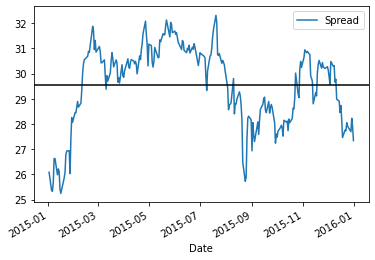

In [33]:
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);